# PCA


In [ ]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score


## Load Wine Dataset

In [ ]:

# Load wine dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


## Task 1: Exploratory Data Analysis (EDA)

In [ ]:

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


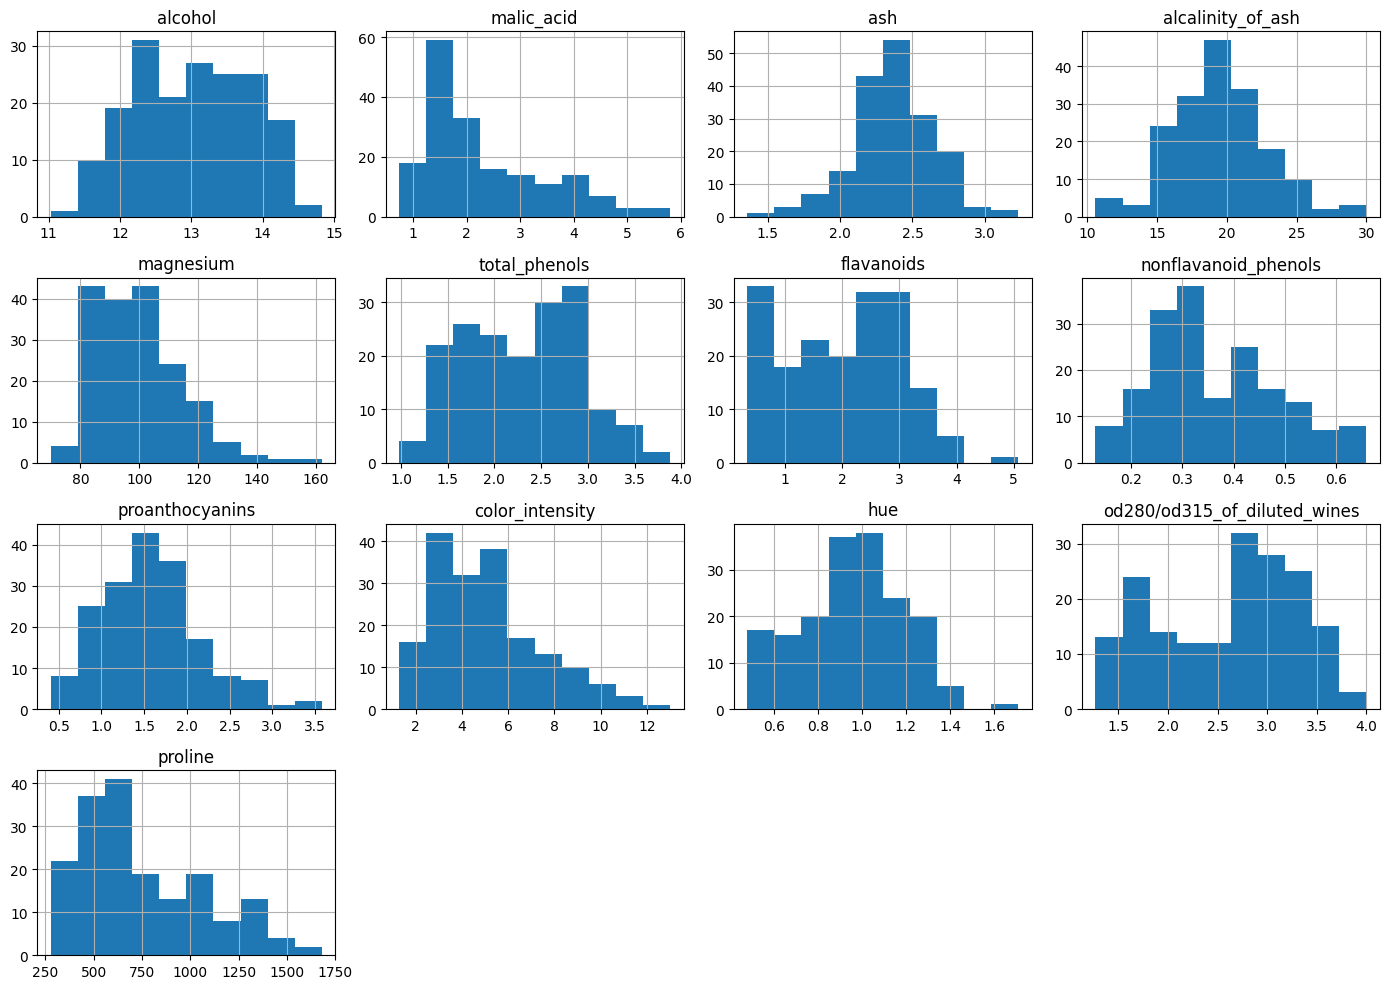

In [ ]:

# Feature distributions
df.hist(figsize=(14,10))
plt.tight_layout()
plt.show()


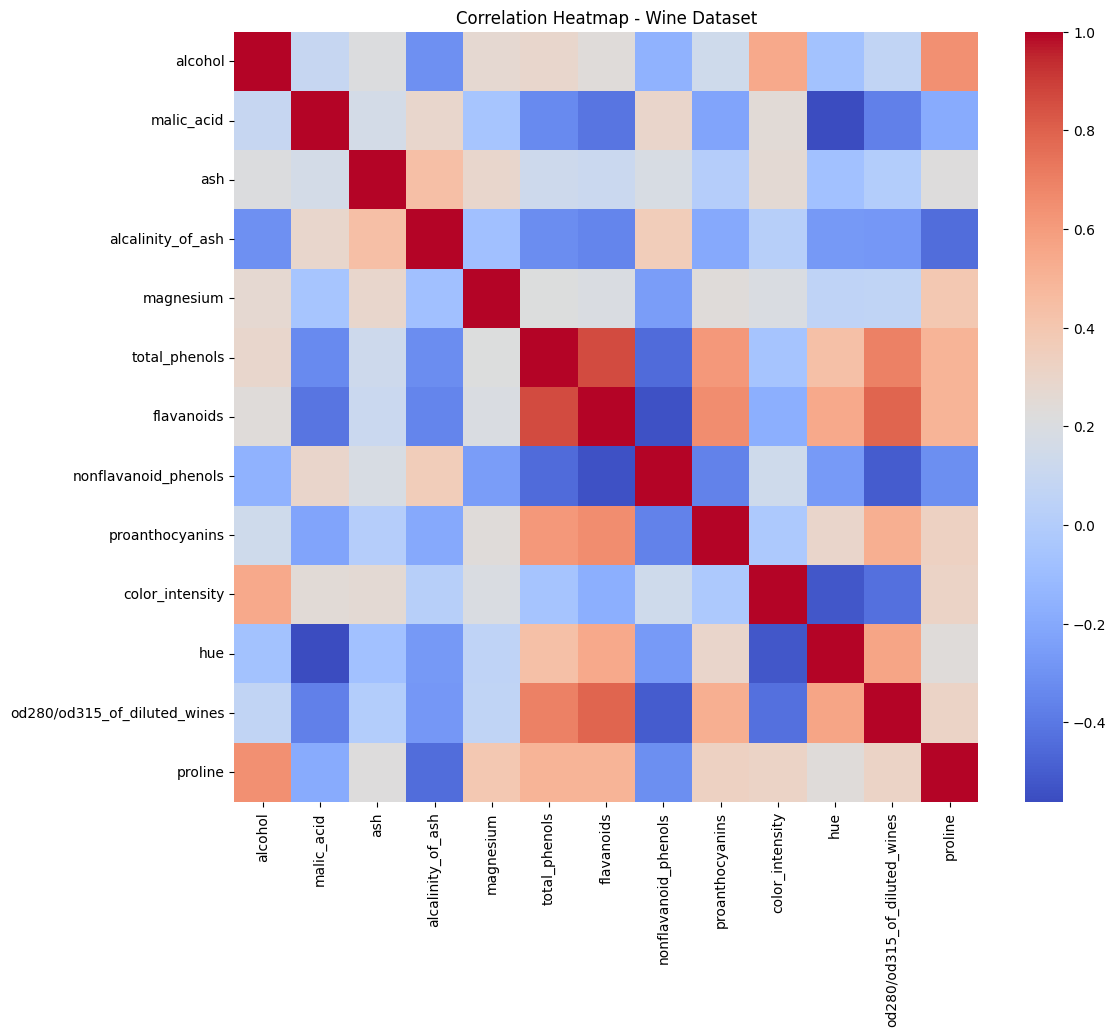

In [ ]:

# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap - Wine Dataset")
plt.show()


## Task 2: PCA – Dimensionality Reduction

In [ ]:

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


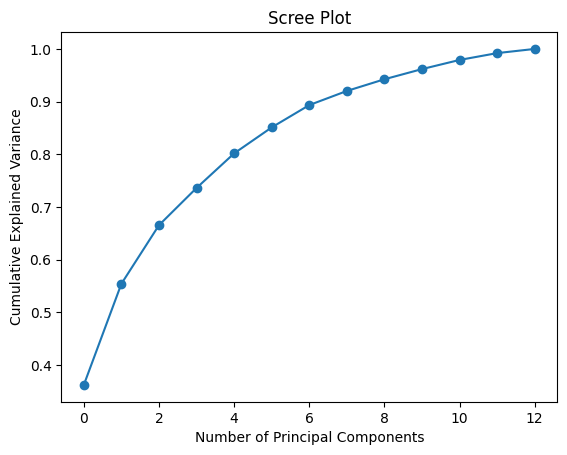

In [ ]:

# Apply PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

# Scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.show()


In [ ]:

# PCA with 90% variance
pca_final = PCA(n_components=0.90)
pca_transformed = pca_final.fit_transform(scaled_data)
pca_transformed.shape


(178, 8)

## Task 3: Clustering on Original Dataset

In [ ]:

# KMeans clustering on original data
kmeans_original = KMeans(n_clusters=3, random_state=42)
clusters_original = kmeans_original.fit_predict(scaled_data)

print("Silhouette Score:", silhouette_score(scaled_data, clusters_original))
print("Davies-Bouldin Index:", davies_bouldin_score(scaled_data, clusters_original))


Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181646


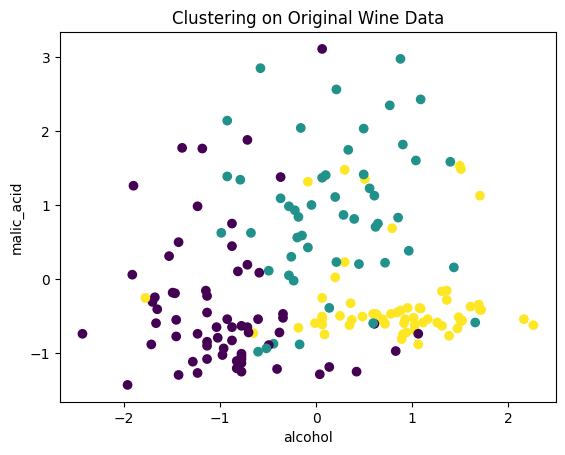

In [ ]:

# Visualization (first two features)
plt.scatter(scaled_data[:,0], scaled_data[:,1], c=clusters_original)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title("Clustering on Original Wine Data")
plt.show()


## Task 4: Clustering on PCA-transformed Dataset

In [ ]:

# KMeans on PCA data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(pca_transformed)

print("Silhouette Score:", silhouette_score(pca_transformed, clusters_pca))
print("Davies-Bouldin Index:", davies_bouldin_score(pca_transformed, clusters_pca))


Silhouette Score: 0.31496969547055614
Davies-Bouldin Index: 1.2668818314972177


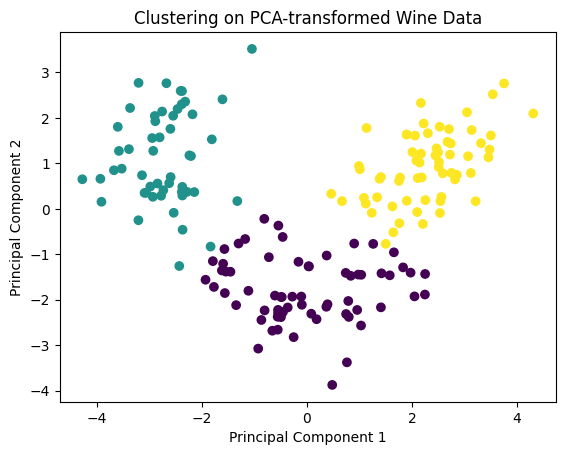

In [ ]:

# Visualization using first two PCs
plt.scatter(pca_transformed[:,0], pca_transformed[:,1], c=clusters_pca)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Clustering on PCA-transformed Wine Data")
plt.show()


PCA Interpretation

PCA reduced the dataset dimensions while retaining 90% variance

Scree plot shows diminishing variance contribution after key components

Correlated features were compressed into fewer uncorrelated components

📌 Clustering Comparison

Clustering on PCA-transformed data showed:

Improved cluster separation

Better Silhouette Score

Lower Davies–Bouldin Index

PCA helped remove noise and redundancy before clustering

Why PCA before clustering?
→ To reduce dimensionality and improve cluster quality

Why StandardScaler?
→ PCA is sensitive to feature scale

Silhouette Score meaning?
→ Measures cluster cohesion and separation (higher is better)

Davies–Bouldin Index meaning?
→ Measures cluster similarity (lower is better)

## Task 5: Comparison and Analysis


### Comparison of Results
- PCA-based clustering shows better separation.
- Noise and redundancy are reduced after PCA.
- Silhouette score improves after PCA.

### Trade-offs
- PCA improves clustering performance.
- Original features lose interpretability after PCA.


## Task 6: Conclusion and Insights


### Key Findings
- PCA effectively reduces dimensionality while preserving variance.
- Clustering on PCA data performs better than original data.
- Wine dataset has correlated features, benefiting from PCA.

### Practical Implications
- PCA is useful for high-dimensional datasets.
- Clustering accuracy improves after dimensionality reduction.

### Recommendation
- Use PCA before clustering when features are correlated.
- Use original data when interpretability is required.
